# SAT & ACT Scores vs Participation Analysis
By: Nick Lomeli

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

plt.style.use('ggplot')

## SAT Data

### Create a DataFrame for the 2017 SAT data

In [2]:
sat_17 = pd.read_csv('./data/sat_2017.csv')

In [3]:
sat_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [4]:
sat_17.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080


### Create a DataFrame for the 2018 SAT data

In [5]:
sat_18 = pd.read_csv('./data/sat_2018.csv')

In [6]:
sat_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [7]:
sat_18.head(2)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106


## Clean up the data
- Convert the `Participation` feature from `object` to `int` dtype in both DataFrames
- Change the feature name from `Evidence-Based Reading and Writing` to `English` in both DataFrames

In [8]:
sat_17['Participation'] = sat_17['Participation'].str.rstrip('%').astype(int)

In [9]:
sat_18['Participation'] = sat_18['Participation'].str.rstrip('%').astype(int)

In [10]:
sat_17.rename({'Evidence-Based Reading and Writing': 'English'}, axis = 1, inplace = True)

In [11]:
sat_18.rename({'Evidence-Based Reading and Writing': 'English'}, axis = 1, inplace = True)

## Exploratory Data Analysis (EDA)

In [12]:
sat_17.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation,51.0,39.803922,35.276632,2.0,4.0,38.0,66.0,100.0
English,51.0,569.117647,45.666901,482.0,533.5,559.0,613.0,644.0
Math,51.0,547.627451,84.909119,52.0,522.0,548.0,599.0,651.0
Total,51.0,1126.098039,92.494812,950.0,1055.5,1107.0,1212.0,1295.0


In [13]:
sat_18.describe().T

,count,mean,std,min,25%,50%,75%,max
Participation,51.0,45.745098,37.314256,2.0,4.5,52.0,77.5,100.0
English,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
Math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
Total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


## Scatterplots showing relationship between participation and scores

<Axes: title={'center': '2018 SAT data'}, xlabel='Participation', ylabel='Total'>

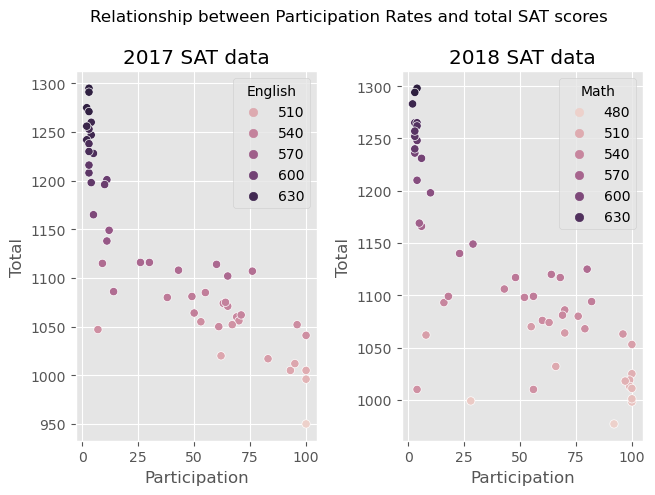

<Figure size 500x2000 with 0 Axes>

In [14]:
#subplots
fig, ax = plt.subplots(1, 2)
plt.figure(figsize = (5, 20))

#titles and spacing between plots
fig.suptitle('Relationship between Participation Rates and total SAT scores')
fig.tight_layout(h_pad = 10, w_pad=3)
fig.subplots_adjust(top=.85)
ax[0].set_title('2017 SAT data')
ax[1].set_title('2018 SAT data')

#2017 SAT data
sns.scatterplot(
    data = sat_17,
    x = 'Participation',
    y = 'Total',
    hue = 'English',
    ax = ax[0])

sns.scatterplot(
    data = sat_18,
    x = 'Participation',
    y = 'Total',
    hue = 'Math',
    ax = ax[1])

#### There is a linear relationship between participation rates and total SAT scores. As the particpation rate increase the total score decreases.

## Heatmaps showing the correlation between features in our data

<Axes: title={'center': '2018 SAT Data'}>

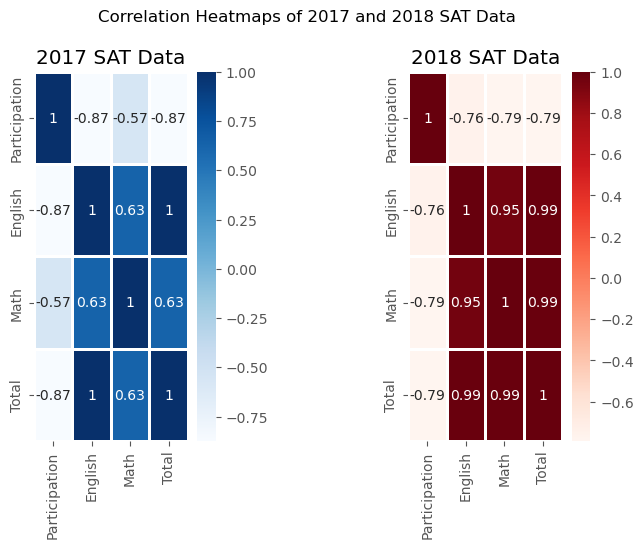

<Figure size 500x3000 with 0 Axes>

In [15]:
#subplots
fig, ax = plt.subplots(1, 2)
plt.figure(figsize = (5, 30))

#titles and spacing
fig.suptitle('Correlation Heatmaps of 2017 and 2018 SAT Data')
fig.tight_layout(h_pad = 10, w_pad=10)
fig.subplots_adjust(top=.85)
ax[0].set_title('2017 SAT Data')
ax[1].set_title('2018 SAT Data')

#2017 SAT data
sns.heatmap(
    sat_17.corr(numeric_only = True),
    annot = True,
    linewidths = 1,
    linecolor = 'white',
    cmap = 'Blues', ax = ax[0]
)

#2018 SAT data
sns.heatmap(
    sat_18.corr(numeric_only = True),
    annot = True,
    linewidths = 1,
    linecolor = 'white',
    cmap = 'Reds',
    ax = ax[1]
)

#### In 2017 the correlation between participation and total score was -0.87. In 2019 it was -0.79. Both are very strong negative correlations and supports what we just saw above in the scatterplots.

## Horizontal Bar Plot showing the average total SAT score by state

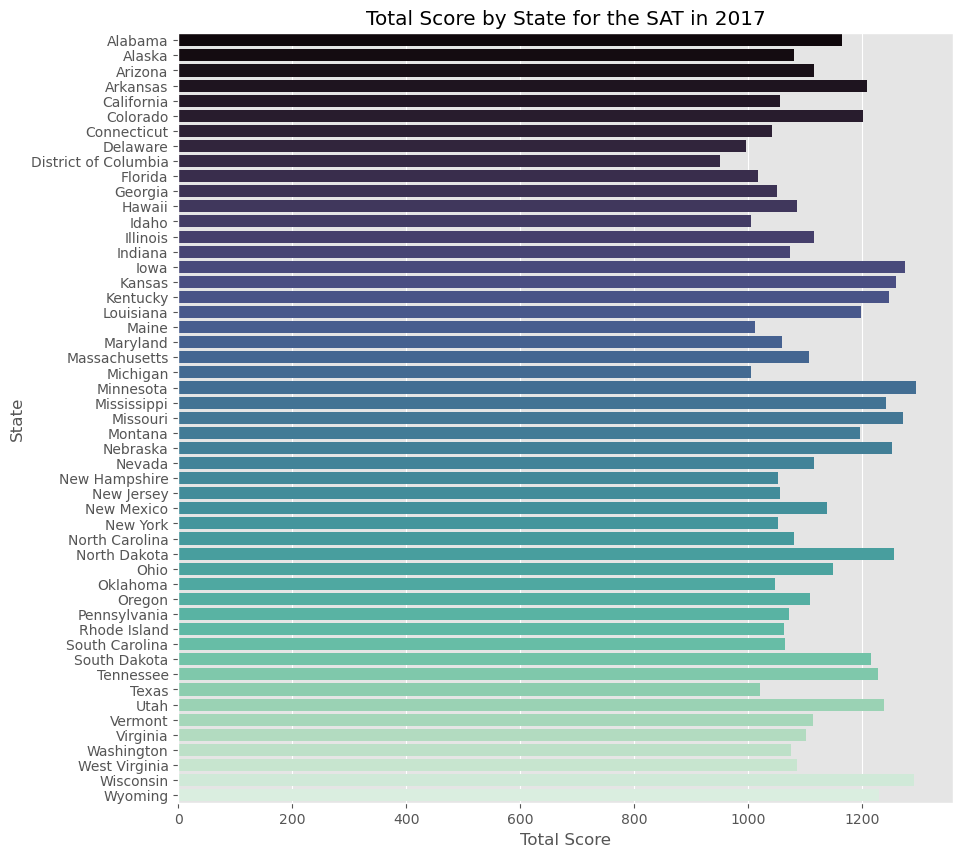

In [16]:
plt.figure(figsize=(10, 10))

sns.barplot(
    data = sat_17,
    x = 'Total', 
    y = 'State',
    orient = 'h',
    palette = 'mako')

plt.title('Total Score by State for the SAT in 2017')
plt.xlabel('Total Score')
plt.ylabel('State');

### Creating a link to data in the `folium` library

In [17]:
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'

#### Creating a variable called `abbrevs` that will store the state abbreviation data that will be used for matching within folium.

In [18]:
abbrevs = '''
Alabama - AL
Alaska - AK
Arizona - AZ
Arkansas - AR
California - CA
Colorado - CO
Connecticut - CT
Delaware - DE
Florida - FL
Georgia - GA
Hawaii - HI
Idaho - ID
Illinois - IL
Indiana - IN
Iowa - IA
Kansas - KS
Kentucky - KY
Louisiana - LA
Maine - ME
Maryland - MD
Massachusetts - MA
Michigan - MI
Minnesota - MN
Mississippi - MS
Missouri - MO
Montana - MT
Nebraska - NE
Nevada - NV
New Hampshire - NH
New Jersey - NJ
New Mexico - NM
New York - NY
North Carolina - NC
North Dakota - ND
Ohio - OH
Oklahoma - OK
Oregon - OR
Pennsylvania - PA
Rhode Island - RI
South Carolina - SC
South Dakota - SD
Tennessee - TN
Texas - TX
Utah - UT
Vermont - VT
Virginia - VA
Washington - WA
West Virginia - WV
Wisconsin - WI
Wyoming - WY
'''

#### Creating a dictionary where the full state name is the key and the abbreviation is the value.

In [19]:
states = [i.split('-') for i in abbrevs.split('\n')[1:-1]]

states_clean = [i[0].rstrip() for i in states]

abbrevs = [i[1].lstrip() for i in states]

state_dict = {s:a for s, a in zip(states_clean, abbrevs)}

In [20]:
states[:3]

[['Alabama ', ' AL'], ['Alaska ', ' AK'], ['Arizona ', ' AZ']]

In [21]:
states_clean[:3]

['Alabama', 'Alaska', 'Arizona']

In [22]:
abbrevs[:3]

['AL', 'AK', 'AZ']

In [23]:
state_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY'}

## Create a new column and that contains the corresponding state abbreviation.

In [24]:
sat_17['State Abv'] = sat_17['State'].map(state_dict)

sat_18['State Abv'] = sat_18['State'].map(state_dict)

In [25]:
#confirm changes
sat_17.head(1)

,State,Participation,English,Math,Total,State Abv
0,Alabama,5,593,572,1165,AL


In [26]:
sat_18.head(1)

,State,Participation,English,Math,Total,State Abv
0,Alabama,6,595,571,1166,AL


## Use folium to create maps of the 2017 SAT participation rates and total scores

In [27]:
participation_map_sat_17 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [28]:
folium.Choropleth(geo_data = state_geo,
                  data = sat_17,
                  columns = ['State Abv', 'Participation'],
                  key_on = 'feature.id',
                  legend_name = 'SAT Participation Rate'
                 ).add_to(participation_map_sat_17)

### 2017 SAT Participation Rates

In [29]:
participation_map_sat_17

In [30]:
total_map_sat_17 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [31]:
folium.Choropleth(geo_data = state_geo,
                  data = sat_17,
                  columns = ['State Abv', 'Total'],
                  key_on = 'feature.id',
                  legend_name = 'SAT Total Score'
                 ).add_to(total_map_sat_17)

### 2017 SAT Total Scores

In [32]:
total_map_sat_17

--------

## Use folium to create maps of the 2018 SAT participation rates and total scores

In [33]:
participation_map_sat_18 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [34]:
folium.Choropleth(geo_data = state_geo,
                  data = sat_18,
                  columns = ['State Abv', 'Participation'],
                  key_on = 'feature.id',
                  legend_name = 'SAT Participation Rate'
                 ).add_to(participation_map_sat_18)

### 2018 SAT Participation Rates

In [35]:
participation_map_sat_18

In [36]:
total_map_sat_18 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [37]:
folium.Choropleth(geo_data = state_geo,
                  data = sat_18,
                  columns = ['State Abv', 'Total'],
                  key_on = 'feature.id',
                  legend_name = 'SAT Total Score'
                 ).add_to(total_map_sat_18)

### 2018 SAT Total Scores

In [38]:
participation_map_sat_18

---------
-------

## Now that we have analyzed the 2017 and 2018 SAT data for the country, let's dive into the ACT datasets.

#### Read in the 2017 and 2018 ACT datasets

In [39]:
act_17 = pd.read_csv('./data/act_2017.csv')

act_18 = pd.read_csv('./data/act_2018.csv')

In [40]:
act_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


In [41]:
act_17.head(2)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2


In [42]:
act_17 = act_17.loc[1:, :].copy() #remove row for National info

In [43]:
act_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [44]:
act_18.head(2)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8


### Clean up both ACT datasets just like we did above for the SAT datasets
- Remove percentages from the `Participation` feature and convert from `object` to `int` dtype.
- Add the state abbreviations column for each corresponding state
- The composite column has one value with an "x" that will need to be cleaned up before we can pass the values to the map.

In [45]:
act_17['Participation'] = act_17['Participation'].str.rstrip('%').astype(int)

act_18['Participation'] = act_18['Participation'].str.rstrip('%').astype(int)

In [46]:
act_17['State Abv'] = act_17['State'].map(state_dict)

act_18['State Abv'] = act_18['State'].map(state_dict)

In [47]:
act_17.head(2)

,State,Participation,English,Math,Reading,Science,Composite,State Abv
1,Alabama,100,18.9,18.4,19.7,19.4,19.2,AL
2,Alaska,65,18.7,19.8,20.4,19.9,19.8,AK


In [48]:
act_18.head(2)

,State,Participation,Composite,State Abv
0,Alabama,100,19.1,AL
1,Alaska,33,20.8,AK


In [49]:
act_17['Composite'].unique()

array(['19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2', '24.1',
       '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7', '20.0',
       '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4', '20.3',
       '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7', '24.0',
       '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [50]:
#remove the "x"
act_17.loc[act_17['Composite'] == '20.2x', 'Composite'] = act_17.loc[act_17['Composite'] == '20.2x', 'Composite'].str.rstrip('x')

#convert dtype from object to float
act_17['Composite'] = act_17['Composite'].astype(float)

In [51]:
#double check that it worked correctly
act_17['Composite'].dtype

dtype('float64')

## EDA

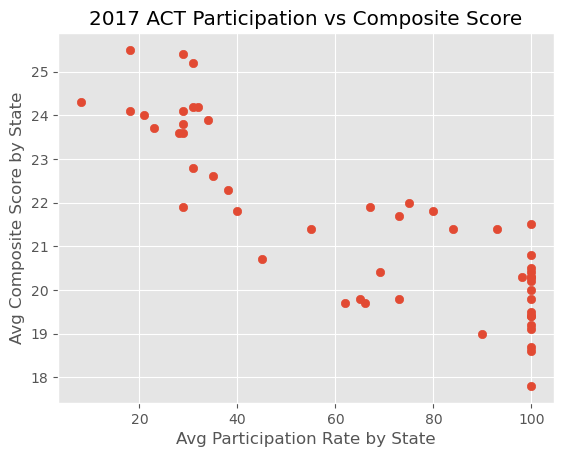

In [52]:
plt.scatter(act_17['Participation'], act_17['Composite'])

plt.xlabel('Avg Participation Rate by State')

plt.ylabel('Avg Composite Score by State')

plt.title('2017 ACT Participation vs Composite Score');

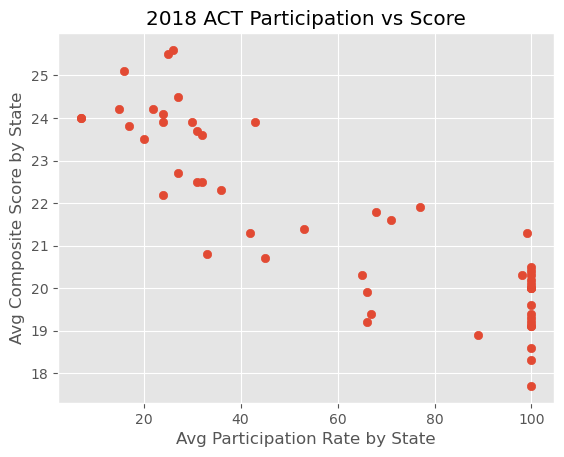

In [53]:
plt.scatter(act_18['Participation'], act_18['Composite'])

plt.xlabel('Avg Participation Rate by State')

plt.ylabel('Avg Composite Score by State')

plt.title('2018 ACT Participation vs Score');

#### Just like we saw above with the 2017 and 2018 SAT data - when it comes to the ACT data in 2017 and 2018, as participation rates increase the average composite score gets lower.

## Use folium to create maps of the 2017 ACT participation rates and composite scores

In [54]:
participation_map_act_17 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [55]:
folium.Choropleth(geo_data = state_geo,
                  data = act_17,
                  columns = ['State Abv', 'Participation'],
                  key_on = 'feature.id',
                  legend_name = '2017 ACT Participation Rate'
                 ).add_to(participation_map_act_17)

### 2017 ACT Participation Rates

In [56]:
participation_map_act_17

In [57]:
composite_map_act_17 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [58]:
folium.Choropleth(geo_data = state_geo,
                  data = act_17,
                  columns = ['State Abv', 'Composite'],
                  key_on = 'feature.id',
                  legend_name = '2017 ACT Composite Score'
                 ).add_to(composite_map_act_17)

### 2017 ACT Composite Scores

In [59]:
composite_map_act_17

In [60]:
participation_map_act_18 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [61]:
folium.Choropleth(geo_data = state_geo,
                  data = act_18,
                  columns = ['State Abv', 'Participation'],
                  key_on = 'feature.id',
                  legend_name = '2018 Participation Rate'
                 ).add_to(participation_map_act_18)

### 2018 ACT Participation Scores

In [62]:
participation_map_act_18

In [63]:
composite_map_act_18 = folium.Map(location = [39.0119, -98.4842],
               zoom_start = 3)

In [64]:
folium.Choropleth(geo_data = state_geo,
                  data = act_18,
                  columns = ['State Abv', 'Composite'],
                  key_on = 'feature.id',
                  legend_name = '2018 Composite Score'
                 ).add_to(composite_map_act_18)

### 2018 ACT Composite Scores

In [65]:
composite_map_act_18

-----
-----

### Conclusion and recomendations

The SAT and ACT data reviewed above show a remarkably strong relationship between total score participation and rate for both the SAT and ACT exams. As the participation rate increases in a given state, the average score steadily decreases. I recommend that states invest more in preparing students for these exams. One way is to create a new class that is devoted to teaching the information contained within these exams to ensure students are adequately prepared. Further research is required to understand what drives the high test scores of the students in states with low participation rates.